In [34]:
import spacy,gensim.downloader as api,numpy as np,matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer



In [7]:
paraphrase_bart_large="""The author received the approved version of the manuscript a few days ago. 
The manuscript was submitted to Springer for publication last week.
The author says he is grateful for the full support of the Springer team."""

In [10]:
paraphrase_pegasus="""Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I am very appreciated the full support of the professor, for our Springer proceedings publication “During our final discuss,
I told him about the new submission — the one we were waiting since last autumn, 
but the updates was confusing as it not included the complete feedback from reviewer or maybe editor?
Anyway,I believe the team, although bit delay and less communication at recent days, they really"""

In [11]:
paraphrase_t5_base="""Falkenstein: today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great . 
I am very grateful, all of us, for the acceptance and efforts until the Springer link came finally last week,
I think. """

In [6]:
concatinated_texts = """Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in
our lives. Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I got this message to see the approved message. In fact, I have received the message from the
professor, to show me, this, a couple of days ago. I am very appreciated the full support of the
professor, for our Springer proceedings publication
“During our final discuss, I told him about the new submission — the one we were waiting since
last autumn, but the updates was confusing as it not included the full feedback from reviewer or
maybe editor?Anyway, I believe the team, although bit delay and less communication at recent days, they really
tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance
and efforts until the Springer link came finally last week, I think.
Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit before
he sending again. Because I didn’t see that part final yet, or maybe I missed, I apologize if so.
Overall, let us make sure all are safe and celebrate the outcome with strong coffee and future
targets”
"""

In [14]:
nlp = spacy.load("en_core_web_sm")

nlp_txt = nlp(concatinated_texts)
bart_large_nlp = nlp(paraphrase_bart_large)
pegasus_nlp = nlp(paraphrase_pegasus)
t5_nlp = nlp(paraphrase_t5_base)

print("BART similarity:", nlp_txt.similarity(bart_large_nlp))
print("PEGASUS similarity:", nlp_txt.similarity(pegasus_nlp))
print("T5 similarity:", nlp_txt.similarity(t5_nlp))

BART similarity: 0.628777265548706
PEGASUS similarity: 0.8871038556098938
T5 similarity: 0.8427485227584839


C:\Users\liste\AppData\Local\Temp\ipykernel_14956\548575570.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("BART similarity:", nlp_txt.similarity(bart_large_nlp))
C:\Users\liste\AppData\Local\Temp\ipykernel_14956\548575570.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-s

In [22]:
# φορτώνουμε προεκπαιδευμένα embeddings 
#Glove,Word2Vec,Fast_text cosine similarity
glove = api.load("glove-wiki-gigaword-100")
word2vec = api.load("word2vec-google-news-300")
fasttext = api.load("fasttext-wiki-news-subwords-300")

def get_vector(word,model):
    try:
        return model[word]
    except KeyError:
        return np.zeros(model.vector_size)  # αν δεν υπάρχει η λέξη στο λεξιλόγιο

def sentence_vector(sentence,model):
    words = sentence.lower().split()
    vectors = [get_vector(w,model) for w in words if w in model]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)
def cosine_sim(text1, text2, model):
    vec1 = sentence_vector(text1, model).reshape(1, -1)
    vec2 = sentence_vector(text2, model).reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]
#glove
print("Cosine similarity (GloVe,Bart-large):", cosine_sim(concatinated_texts,paraphrase_bart_large,glove))
print("Cosine similarity (GloVe,t5):", cosine_sim(concatinated_texts,paraphrase_t5_base,glove))
print("Cosine similarity (GloVe,pegasus):", cosine_sim(concatinated_texts,paraphrase_pegasus,glove))
#Word2vec
print("Cosine similarity (Word2Vec,Bart-large):", cosine_sim(concatinated_texts,paraphrase_bart_large,word2vec))
print("Cosine similarity (Word2Vec,t5):", cosine_sim(concatinated_texts,paraphrase_t5_base,word2vec))
print("Cosine similarity (Word2Vec,pegasus):", cosine_sim(concatinated_texts,paraphrase_pegasus,word2vec))
#fasttext
print("Cosine similarity (fast text,Bart-large):", cosine_sim(concatinated_texts,paraphrase_bart_large,fasttext))
print("Cosine similarity (fast text,t5):", cosine_sim(concatinated_texts,paraphrase_t5_base,fasttext))
print("Cosine similarity (fast text,pegasus):", cosine_sim(concatinated_texts,paraphrase_pegasus,fasttext))

Cosine similarity (GloVe,Bart-large): 0.9449013
Cosine similarity (GloVe,t5): 0.99111223
Cosine similarity (GloVe,pegasus): 0.99610674
Cosine similarity (Word2Vec,Bart-large): 0.7074824
Cosine similarity (Word2Vec,t5): 0.90765077
Cosine similarity (Word2Vec,pegasus): 0.9702511
Cosine similarity (fast text,Bart-large): 0.940945
Cosine similarity (fast text,t5): 0.9857428
Cosine similarity (fast text,pegasus): 0.9890727


In [17]:
#Bert cosine similarity
# φορτώνουμε sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# embeddings
orig_emb = model.encode(concatinated_texts, convert_to_tensor=True)
bart_emb = model.encode(paraphrase_bart_large, convert_to_tensor=True)
pegasus_emb = model.encode(paraphrase_pegasus, convert_to_tensor=True)
t5_emb = model.encode(paraphrase_t5_base, convert_to_tensor=True)

# cosine similarities
print("BART similarity:", util.cos_sim(orig_emb, bart_emb).item())
print("PEGASUS similarity:", util.cos_sim(orig_emb, pegasus_emb).item())
print("T5 similarity:", util.cos_sim(orig_emb, t5_emb).item())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\liste\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\liste\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BART similarity: 0.5535373687744141
PEGASUS similarity: 0.7865666747093201
T5 similarity: 0.5155146718025208


In [26]:
#custom_nlp_workflow
vectorizer = TfidfVectorizer()
bart = vectorizer.fit_transform([concatinated_texts, paraphrase_bart_large])
t5= vectorizer.fit_transform([concatinated_texts, paraphrase_t5_base])
pegasus= vectorizer.fit_transform([concatinated_texts, paraphrase_pegasus])

# Υπολογισμός cosine similarity
sim_score_bart = cosine_similarity(bart[0], bart[1])[0][0]
sim_score_t5 = cosine_similarity(t5[0], t5[1])[0][0]
sim_score_pegasus = cosine_similarity(pegasus[0], pegasus[1])[0][0]
print("Cosine similarity Bart-lagre(custom ):", sim_score_bart)
print("Cosine similarity t5(custom ):", sim_score_t5)
print("Cosine similarity pegasus(custom ):", sim_score_pegasus)


Cosine similarity Bart-lagre(custom ): 0.5025424245744108
Cosine similarity t5(custom ): 0.5819206746830882
Cosine similarity pegasus(custom ): 0.7917967762194192


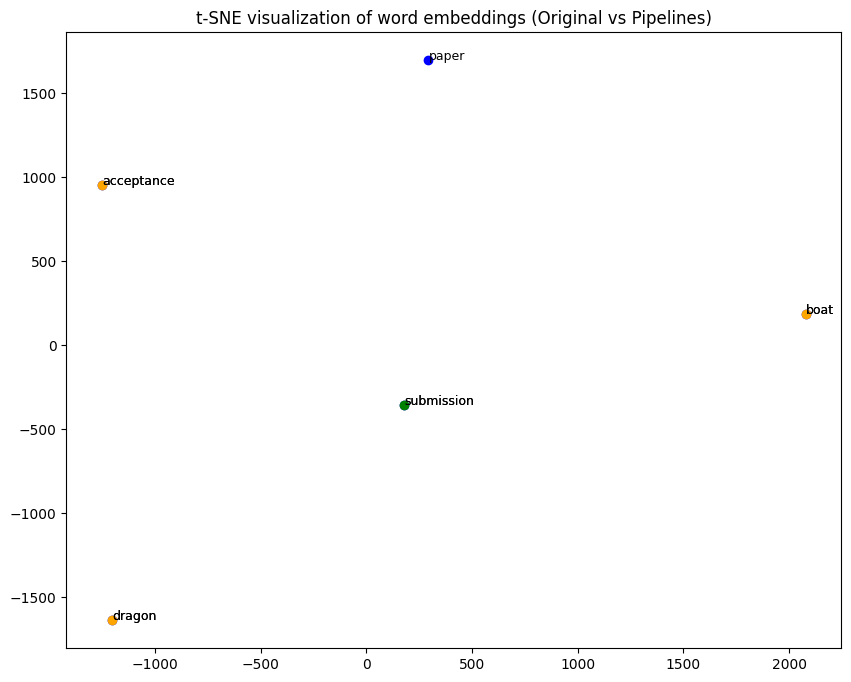

In [36]:
#visualization
keywords = ["dragon", "boat", "festival", "professor", "Springer", "paper", "acceptance", "submission"]
def get_sentence_vectors(text, model, selected_words):
    text_words = [w.lower() for w in text.split()]
    vectors = []
    labels = []
    for w in selected_words:
        if w in text_words and w in model:
            vectors.append(get_vector(w, model))
            labels.append(w)
    return np.array(vectors), labels

def filter_nonzero_vectors(vectors, labels):
    if vectors.size == 0:
        return np.empty((0, 100)), []
    filtered_vectors = []
    filtered_labels = []
    for vec, label in zip(vectors, labels):
        if np.any(vec):  # κρατά μόνο αν δεν είναι όλα 0
            filtered_vectors.append(vec)
            filtered_labels.append(label)
    return np.array(filtered_vectors), filtered_labels
#Λήψη vectors για κάθε pipeline 
orig_vectors, orig_labels = get_sentence_vectors(concatinated_texts, glove, keywords)
bart_vectors, bart_labels = get_sentence_vectors(paraphrase_bart_large, glove, keywords)
peg_vectors, peg_labels = get_sentence_vectors(paraphrase_pegasus, glove, keywords)
t5_vectors, t5_labels = get_sentence_vectors(paraphrase_t5_base, glove, keywords)

orig_vectors, orig_labels = filter_nonzero_vectors(orig_vectors, orig_labels)
bart_vectors, bart_labels = filter_nonzero_vectors(bart_vectors, bart_labels)
peg_vectors, peg_labels = filter_nonzero_vectors(peg_vectors, peg_labels)
t5_vectors, t5_labels = filter_nonzero_vectors(t5_vectors, t5_labels)
# --- 6. Συνένωση όλων για t-SNE ---
all_vectors = np.vstack([orig_vectors, bart_vectors, peg_vectors, t5_vectors])
all_labels = orig_labels + bart_labels + peg_labels + t5_labels
groups = (["Original"]*len(orig_labels) + 
          ["BART"]*len(bart_labels) + 
          ["PEGASUS"]*len(peg_labels) + 
          ["T5"]*len(t5_labels))

# --- 7. t-SNE ---
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(all_vectors)
# --- 8. Plot ---
plt.figure(figsize=(10,8))
colors = {"Original":"blue", "BART":"red", "PEGASUS":"green", "T5":"orange"}

for i, label in enumerate(all_labels):
    x, y = vectors_2d[i]
    plt.scatter(x, y, color=colors[groups[i]])
    plt.text(x+0.5, y+0.5, label, fontsize=9)

plt.title("t-SNE visualization of word embeddings (Original vs Pipelines)")
plt.show()